
![image](../../Utilities/tensorflow-logo.png)

__Author: Christian Urcuqui__

__Date: 5 September 2018__

__Last updated: 5 September 2018__


This notebook is oriented to understand TensorFlow, some of the examples and explanations were taken from the references (books and websites). 


# Understanding Tensorflow

TensorFlow is an open source machine learning library for research and production, it is recognized due its implementations in _deep learning_. This project was proposed for high numerical computation. It has a flexible architecture for the deployment across a variety of platforms(i.e. CPUs, GPUs, TPUs), and from desktops to cluster of servers to mobile 

This project was developed by the Google Brain team and it was realized at the year 2015.

https://www.tensorflow.org

In [2]:
%%HTML

<iframe width="626" height="352" src="https://www.youtube.com/embed/mWl45NkFBOc" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

This notebook will review Tensorflow in order to understand its main components and how it works, so it is divided in the next sections:

+ [Computation Graphs](#Computation-Graphs)
+ [Graphs, Sessions, and Fetches](#Graphs,-Sessions,-and-Fetches)
+ [Matrix multiplication](#Matrix-multiplication)
+ [Names](#Names)
+ [References](#References)



## Computation Graphs 

TensorFlow integrates the concept of computing operations that interact with one another through the application of dataflow graphs.

The graph concept is a simple abstraction of nodes interconnected by edges, this concept is applicated in different contexts, for example network communications, neuronal networks and other kind of situations. 

In a _dataflow graph_, the edges allow data to "flow" from one node to another in a directed manner. On the other hand, each of the graph's nodes represents an operation, possibly applied to some input, and can generate an output that is transmitted on to other nodes. 

Operations in the graph include all kinds of functions, from simple arithmetic ones such as multiplication to more complex ones.

Each graph has its own set of node dependencies and these relationships are classified as _direct_ and _indirect_. Being able to locate dependencies between units of our model allows us to both distribute computations across available resources and avoid performing redundant processes. 

"A Graph contains a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations"[3].

A Tensor is a N-dimensional vector, we can call (1000x3x3) as the shape or dimension of the resulting Tensor. Tensors can either be a constant or a variable

__Nodes are operations, edges are tensor objects__


<img src="../../Utilities/tensor.png" width="500">

TensorFlow has these components, but first we have a skeleton graph. At this point no actual data flows in it and no computations take place. When we run the session, data enters the graph and computations occur.

## Graphs, Sessions, and Fetches

A TensorFlow process involves two main phases:

+ Make a graph 
+ Execute the graph




In [2]:
# let's import the TensorFlow package, we are going to assign the reconized alias "tf"
import tensorflow as tf

Through the import method of TensorFlow we implicitly declared a default graph. In the next example we will create six nodes and the content of these variables should be regarded as the output of the operations, and not the opeartions themselves. 

Three of the nodes are going to be constants. 

In [3]:
a =  tf.constant(5)
b =  tf.constant(2)
c =  tf.constant(3)

Each of the last three nodes gets two existing variables as inputs, and performs simple arithmetic operations on them

In [4]:
d =  tf.multiply(a,b)
e =  tf.add(c, b)
f =  tf.subtract(d,e)

Through the last example, we defined our first graph, a sequence of three constants that are the input of three arithmetic operations. 

We can see the graph through the TensorBoard, in order to d.call this program we must make the logs with the next code, let's see that this new file is in the main package of this .ipynb. Once we have this file we need to use it through the next command 
```
tensorboard --logdir
```

In [17]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

This is the graph result of the six nodes declared

<img src="../../Utilities/tensorboard.png" width="500">


Once, we have finished our graph the next step is to run the computations that it represents, to do this we must create and run a session. 

In [18]:
with tf.Session() as sess:
    outs = sess.run(f)
    sess.close()
print("outs ={}".format(outs))

outs =5


As we saw in the last code, through the Session object, specifically, it's _run()_ method allows us to compute all the nodes in the graph, all the computing nodes were executed according to the set of dependencies. Once, the process is finished we need to close the session.

In [3]:
# let's make another example of graph flow computation 
a = tf.constant(1)
b = tf.constant(2)

d = tf.add(a,b)
c = tf.multiply(a,b)

f = tf.add(c,d)
e = tf.subtract(d,c)

g = tf.div(f,e)

In [4]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

We can create additional graphs and control their association with some given operations _tf.graph()_ creates a new graph, represented as a TensorFlow object. We are going to see that we can have two graphs at the same time in memory.

In [5]:
import tensorflow as tf
print(tf.get_default_graph())

In [6]:
g =  tf.Graph()
print(g)

Look that we have two graphs with different identification, also the graph _g_ is not associated to the default graph. Let's see the associations.

In [5]:
a =  tf.constant(5)

print(a.graph is g)
print(a.graph is tf.get_default_graph())


False
True


_Fetches_ is the argument that is corresponding to the elements of the graph we wish to compute. Then, the idea is to use them through the _session.run()_ method.

In [12]:
with tf.Session() as session:
    fetches = [a,b,c,d,e,f]
    outs = session.run(fetches)
print("outs={}".format(outs))
print(type(outs[0]))

outs=[1, 2, 2, 3, 1, 5]
<class 'numpy.int32'>


Look that each fetch element is a representation of a NumPy object, a resource that I previously presented in this repository. If you want to know more information about this package for scientific computing with Python look this URL 
```
https://github.com/urcuqui/Data-Science/blob/master/Exploratory%20Data%20Analysis/Numpy.ipynb
```
[Numpy](../../Exploratory%20Data%20Analysis/Numpy.ipynb)

In [13]:
c = tf.constant(4.0)
print(c)

Tensor("Const_8:0", shape=(), dtype=float32)


As we saw, when we used _tf.constant_ we made a node with the corresponding passed value. Look that the object's type is a _Tensor_.

Another important feature is the Tensor's attributes, look that they are necessary, but, in some applications (for example, image processing) we must pay attention to these variables. 

### Casting

It is an important to make sure our data types match throughout the graph, if we want to change the data type setting of a Tensor object, we can use the tf.cast() function, passing the relevtant Tensor and the new data type of interest as the firtst and second arguements.

In [2]:
x = tf.constant([1,2,3], name="x", dtype=tf.float32)
print(x.dtype)

<dtype: 'float32'>


In [3]:
x = tf.cast(x, tf.int64)
print(x.dtype)

<dtype: 'int64'>


<img src="https://cdn-images-1.medium.com/max/1600/1*WBopnJ1NgGbsatnFuUrNow.png" width="450px"/>

For the next steps in TensorFlow we need to use random-number generators, which can be generated by a _normal distribution_ through the `tf.random_normal()`, passing the shape, mean, and standard deviation as the first, second, and third arguments, respectively. Another two examples for useful random initializers are the _truncated normal_ where the values below and above two standard deviations from the main do not take, and the _uniform_ that samples values uniformly within some interval [a,b)



<img src="../../Utilities/distribution.png" width="500">

http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

A feature to use when we want to explore the data content of an object is `tf.InteractiveSession()`, through it and the `.eval()` method, we can get a full look at the values without the need to constantly refer to the session object.

`tf.InteractiveSession()` allows us to replace the usual `tf.Session()`, so we dond't need a variable holding the session for running ops.


In [2]:
# tf.linscape allows us to make a ndarray of numbers n evenly spaced from a to b
sess =  tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5)
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0. 1. 2. 3. 4.]



### Matrix multiplication

This is an useful operation performs in TensorFlow via the `tf.matmul(A,B)` function for two Tensor objects A and B. It is important to anote that both Tensors must have the same number of dimensions and that they are aligned correctly with respecto to the intended multiplication. 

Let's do the next product:

$Ax=b$

In [8]:
A = tf.constant([ [1,2,3], [4,5,6]])
print(A.get_shape())

x =  tf.constant([1,0,1])

print(x.get_shape())


(2, 3)
(3,)


If we want to multiply them, we need to add a dimension to _x_, transforming it from a 1D vector to a 2D single-column matrix. 

We can add another dimension through the Tensor's method ```tf.expand_dims()```, together with the position of the added as the second arguement. 

In [9]:
x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A, x)

sess =  tf.InteractiveSession()

print("matmul result:\n {}".format(b.eval()))
sess.close()

(3, 1)
matmul result:
 [[ 4]
 [10]]


In [23]:
# if we want to flip an array, we do it with the next function
print(b.get_shape())
tf.transpose(b)

(2, 1)


<tf.Tensor 'transpose_1:0' shape=(1, 2) dtype=int32>

## Names


Each Tensor object has an identifiying name, this identification is a string. As with _dtype_, we can use the .name attribute to see the name of the object. 

In [3]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64,name='c')
    c2 = tf.constant(4, dtype=tf.int32,name='c')
    
print(c1.name)
print(c2.name)

c:0
c_1:0


Sometimes when dealing with a large, complicated graph, we would like to make some node grouping to make it easier to follow and manage. We do so by using `tf.name_scoe("prefix")` 

In [5]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c')
        c3 = tf.constant(4,dtype=tf.float64,name='c')
        
print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


Prefixes are especially useful when we would like to divide a graph into subgraphs
with some semantic meaning.

## Variables, Placeholders, and Simple Optimization

## Variables

The optimization process tunes the parameters of some given model. For that porporse, TensorFlow uses special objects called _Variables_. Unlike other Tensor objects that are "refilled" with data each time we run the session. __Variables maintain a fixed state in the graph__.

We must call the `tf.Variable()` function to make a Variable and define what value it will be initialized with. Next, we have to explicitly perform an initialization operation by running the session with the `tf.global_variables_initializer()` method, which allocates the memory for the Variable and sets its initial values. 

In [17]:
# random_normal(shape=(1,5),  mean=0.0, stddev=1.0)
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var')
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)
print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_5:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 0.3806144  -1.5771576  -0.9142247   0.00367585  0.0615683 ]]


If we run the code again a new variable is going to appear, as indicated by the automatic concatenation of `_1` to its name. 

## Placeholders

Placeholders can be thought of as empty Variables that will be filled with data later on. We use them by first constructing our graph and only when it is executed them with the input data. Placeholders have an optional shape arguement. If a shape is not fed or is passed as _None_, then the placeholder can be fed with data of any size. 

In [8]:
ph = tf.placeholder(tf.float32, shape=(None,10))
ph

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

We must feed it with some input values or else an exception will be thrown. The input data is passed to the `session.run()` method as a dictionary, where each key corresponds to a placeholder variable name, and the matching values are the data values.

```
with tf.Session as sess:
    sess.run(s, feed_dict={x: X_data, w: w_data})
    
```

In [12]:
import numpy as np

x_data =  np.random.randn(5,10)
w_data = np.random.randn(10,1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=(5,10))
    w = tf.placeholder(tf.float32, shape=(10,1))
    b = tf.fill((5,1), -1.)
    xw = tf.matmul(x,w)
    
    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={x: x_data, w: w_data})
        
print("outs = {}".format(outs))

outs = 0.6382045745849609


## Optimization

### Traning to predict

We want to predict the variable _y_, which we want to esxplain using some feature vector _x_. According to a data science process the idea is to evaluate different models, in this case we are going to evaluate one. Our training data points will be used for "tuning" the model so that it best captures the desired relation. 

Our selected model is a regression model:

$ f(x_{i}) = W^Tx_{i} + b$

$ y_{i} = f(x_{i}) + \epsilon_{i} $

$ f(x_{i}) $ is a linear combination of some input data $ x_{i} $, with a set of weights $w$ and an intercept $b$. Our target output $ y_{i} $ is a noisy version of $ f(x_{i}) $ after being summed with Gaussian noise $ \epsilon_{i} $

In [ ]:
x =  tf.placeholder(tf.float32,shape=[None,3])
y_true = tf.placeholder(tf.float32, shape=None)
w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
b = tf.Variable(0, dtype=tf.float32, name='bias')

In [ ]:
y_pred =  tf.matmul(w, tf.transpose(x)) + b

### Defining a loss function

To capture the discrepancy between our model's predictions and the observed targets, we need a measure reflecting "distance". __This distance is often referred to as an _objective_ or a _loss function_, and we optimize the model by finding the set of parameters (weights and bias in this case) that minimize it.__


### MSE and cross entropy

MSE (Mean squared error) is the most used loss, where for all samples we average the squared distances between the real target and what our model predicts across samples.

$ L(y,yˆ) = \frac{1}{N} \sum_{i=1}^{n} (y_{i} - yˆ_{i})^{2} $

This loss minimizes the mean square difference between an observed value an the model's fitted value (these differences are referred to as _residuals_).

### MNIST Regression Model NN

In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def inference(x):
    weight_init = tf.random_normal_initializer()
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", [784, 10], initializer=weight_init)
    b = tf.get_variable("b", [10], initializer=bias_init)
    output = tf.nn.softmax(tf.matmul(x, W) + b)
    return output

In [3]:
def loss(output, y):
    dot_product = y * tf.log(output)    
    xentropy = -tf.reduce_sum(dot_product, reduction_indices=1)
    loss = tf.reduce_mean(xentropy)
    return loss

In [4]:
def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [5]:
def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [8]:
# Parameters

learning_rate = 0.01
training_epochs = 100
batch_size = 100
display_step = 1

with tf.Graph().as_default():
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    #summary_writer = tf.summary.FileWriter("logistic_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            mbatch_x, mbatch_y = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : mnist.validation.images,
                y : mnist.validation.labels
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            #summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "logistic_logs2/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }
    accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    writer = tf.summary.FileWriter("logistic_logs2/", graph=sess.as_default)
    writer.add_graph(tf.get_default_graph())
    print("Test Accuracy:", accuracy)

Validation Error: 0.7181999981403351
Validation Error: 0.5591999888420105
Validation Error: 0.46380001306533813
Validation Error: 0.40119999647140503
Validation Error: 0.35920000076293945
Validation Error: 0.32760000228881836
Validation Error: 0.3046000003814697
Validation Error: 0.2842000126838684
Validation Error: 0.26660001277923584
Validation Error: 0.25459998846054077
Validation Error: 0.24199998378753662
Validation Error: 0.2314000129699707
Validation Error: 0.22439998388290405
Validation Error: 0.21560001373291016
Validation Error: 0.21039998531341553
Validation Error: 0.2038000226020813
Validation Error: 0.19940000772476196
Validation Error: 0.1931999921798706
Validation Error: 0.1899999976158142
Validation Error: 0.18639999628067017
Validation Error: 0.18400001525878906
Validation Error: 0.18059998750686646
Validation Error: 0.17820000648498535
Validation Error: 0.17619997262954712
Validation Error: 0.17379999160766602
Validation Error: 0.17079997062683105
Validation Error: 0.

## Building Multilayer Models

_Classification problem_

Let's modify some parts of the last code in order to a feed-fordward network

### Dataset MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def layer(input, weigth_shape, bias_shape):
    w_init = tf.random_normal_initializer(stddev= (2.0/weigth_shape[0]) ** 0.5)
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", weigth_shape, initializer = w_init)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    return tf.nn.relu(tf.matmul(input, W) + b)

In [3]:
def inference(x):     
    with tf.variable_scope("hidden_1"):
        hidden_1 = layer(x , [784, 256], [256])
    with tf.variable_scope("hidden_2"):
        hidden_2 = layer(hidden_1, [256, 256], [256])
    with tf.variable_scope("output"):
        output = layer(hidden_2, [256, 10], [10])
    return output

In [4]:
def loss(output, y):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)
    return loss

We are going to use some of the methods proposed for the logistic regression approach.

In [5]:
def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("validation", accuracy)
    return accuracy

In [6]:
def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [7]:
import tensorflow as tf
# Parameters

learning_rate = 0.01
training_epochs = 300
batch_size = 100
display_step = 5
train_losses, test_losses = [], []


with tf.Graph().as_default():
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    summary_writer = tf.summary.FileWriter("mnist_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            mbatch_x, mbatch_y = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : mnist.validation.images,
                y : mnist.validation.labels
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            train_losses.append(1 - accuracy)
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "mnist_logs/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }
    accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    #writer = tf.summary.FileWriter("logistic_logs3/", graph=sess.graph)
    #writer.add_graph(tf.get_default_graph())
    print("Test Accuracy:", accuracy)

Instructions for updating:
Colocations handled automatically by placer.
Validation Error: 0.1194000244140625
Validation Error: 0.061399996280670166
Validation Error: 0.046000003814697266
Validation Error: 0.03880000114440918
Validation Error: 0.03280001878738403
Validation Error: 0.02920001745223999
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Validation Error: 0.026600003242492676
Validation Error: 0.02640002965927124
Validation Error: 0.024399995803833008
Validation Error: 0.024200022220611572
Validation Error: 0.022800028324127197
Validation Error: 0.022800028324127197
Validation Error: 0.02240002155303955
Validation Error: 0.021399974822998047
Validation Error: 0.02219998836517334
Validation Error: 0.02120000123977661
Validation Error: 0.021399974822998047
Validation Error: 0.020200014114379883
Validation Error: 0.019599974155426025
Validation Error: 0.019599974155426025
Validation Error: 0.019599974155426025
Validation Error: 0.01859998703002

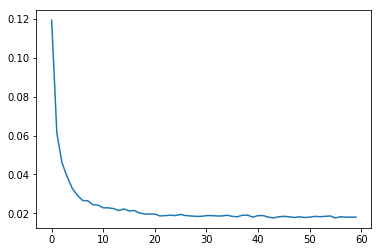

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Validation Error")
plt.show()

### Credit Card Fraud Detection

The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group of ULB, I would like to mention their works [6-9] took from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [21]:
df = pd.read_csv("../../Datasets/credit_fraud_det/creditcard.csv")

#### Data Exploration

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [22]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [3]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns

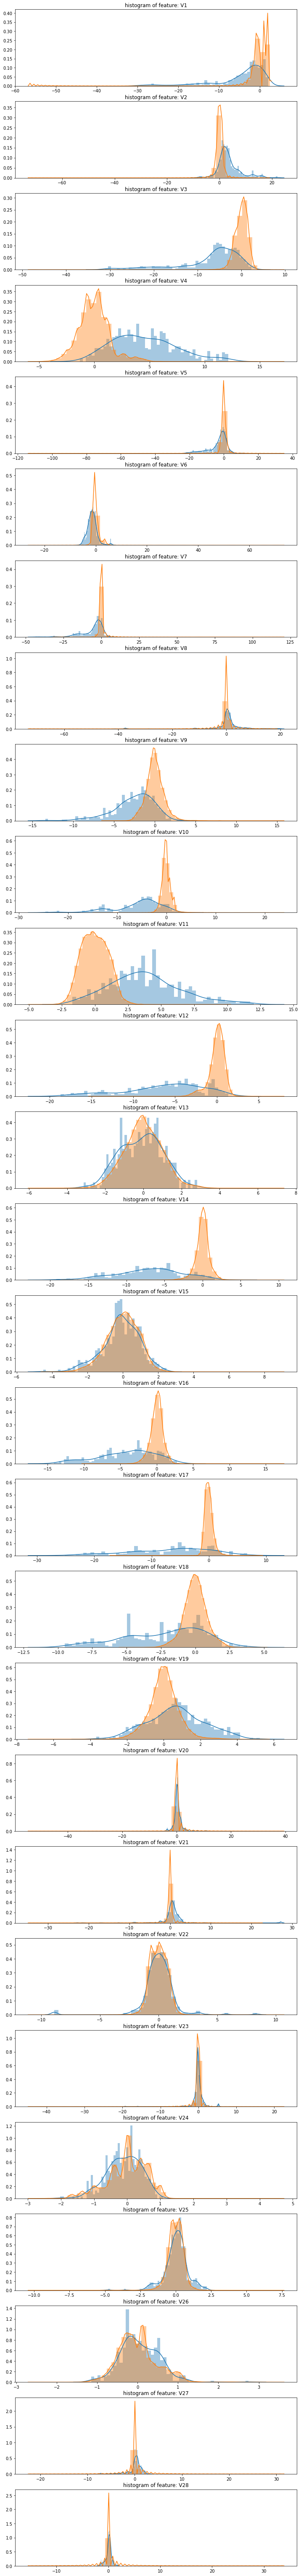

In [56]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [23]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [24]:
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [25]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [26]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

In [27]:
df = df.rename(columns={'Class': 'Fraud'})

In [28]:
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 39 columns):
Time                284807 non-null float64
V1                  284807 non-null float64
V2                  284807 non-null float64
V3                  284807 non-null float64
V4                  284807 non-null float64
V5                  284807 non-null float64
V6                  284807 non-null float64
V7                  284807 non-null float64
V9                  284807 non-null float64
V10                 284807 non-null float64
V11                 284807 non-null float64
V12                 284807 non-null float64
V14                 284807 non-null float64
V16                 284807 non-null float64
V17                 284807 non-null float64
V18                 284807 non-null float64
V19                 284807 non-null float64
V21                 284807 non-null float64
Amount              284807 non-null float64
Fraud               284807 non-null int64
V1_        

In [29]:
df = df.drop(['Normal'], axis=1)

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Fraud',
       'V1_', 'V2_', 'V3_', 'V4_', 'V5_', 'V6_', 'V7_', 'V9_', 'V10_', 'V11_',
       'V12_', 'V14_', 'V16_', 'V17_', 'V18_', 'V19_', 'V21_',
       'Amount_max_fraud'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Fraud'], axis=1), df.loc[:,'Fraud'], test_size=0.3, shuffle=True)

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [55]:
def layer(input, weigth_shape, bias_shape):
    w_init = tf.random_normal_initializer(stddev= (2.0/weigth_shape[0]) ** 0.5)
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", weigth_shape, initializer = w_init)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    return tf.nn.sigmoid(tf.matmul(input, W) + b)

In [77]:
def inference(x):
    with tf.variable_scope("hidden_1"):
        hidden_1 = layer(x , [37, hidden_nodes1], [hidden_nodes1])
    with tf.variable_scope("hidden_2"):
        hidden_2 = layer(hidden_1, [hidden_nodes1, hidden_nodes2], [hidden_nodes2])
    with tf.variable_scope("hidden_3"):
        hidden_3 = layer(hidden_2, [hidden_nodes2, hidden_nodes3], [hidden_nodes3])
        #hidden_3 = tf.nn.dropout(hidden_3, pkeep)
    with tf.variable_scope("output"):
        output = layer(hidden_3, [hidden_nodes3, 2], [2]) 
    return output

In [57]:
def loss(output, y):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)
    return loss

In [63]:
def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("validation", accuracy)
    return accuracy

In [59]:
def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [78]:
import tensorflow as tf
# Parameters

learning_rate = 0.005
training_epochs = 300
batch_size = 2048
display_step = 5
training_dropout = 0.9
train_losses, test_losses = [], []

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5 

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
#pkeep = tf.placeholder(tf.float32)

with tf.Graph().as_default():
    # x is the input layer of 37 nodes
    x = tf.placeholder(tf.float32, [None, 37])    
    # a classification task of two values
    y = tf.placeholder(tf.float32, [None, 2])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    summary_writer = tf.summary.FileWriter("fraud_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(y_train.shape[0]/batch_size)
        # Loop over all batches
        for i in range(total_batch):          
            mbatch_x = X_train_std[i*batch_size : (1+i)*batch_size]            
            mbatch_y = y_train[i*batch_size : (1+i)*batch_size]
            # Fit training using batch data
            #feed_dict = {x : mbatch_x, y : mbatch_y, pkeep: training_dropout}
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : X_test_std,
                y : y_test
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            train_losses.append(1 - accuracy)
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "fraud_logs/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : X_test_std,
        y : y_test
    }
    accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    #writer = tf.summary.FileWriter("logistic_logs3/", graph=sess.graph)
    #writer.add_graph(tf.get_default_graph())
    print("Test Accuracy:", accuracy)

ValueError: Cannot feed value of shape (2048,) for Tensor 'Placeholder_1:0', which has shape '(?, 2)'

In [75]:
X_train_std.shape

(199364, 37)

# References

+ Hope, T., Resheff, Y. S., & Lieder, I. (2017). Learning TensorFlow: A Guide to Building Deep Learning Systems. " O'Reilly Media, Inc.".

+ https://towardsdatascience.com/a-beginner-introduction-to-tensorflow-part-1-6d139e038278
+ https://www.tensorflow.org/api_docs/python/tf/Graph
+ https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
+ https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86765&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
+ [6] Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015
+ [7] Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE
+ [8] Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier
+ [9] Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

